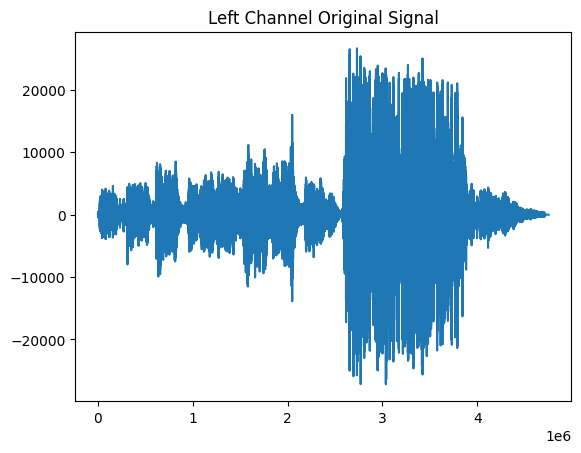

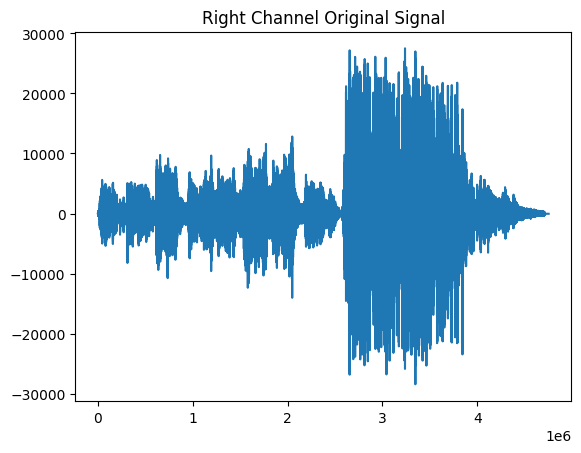

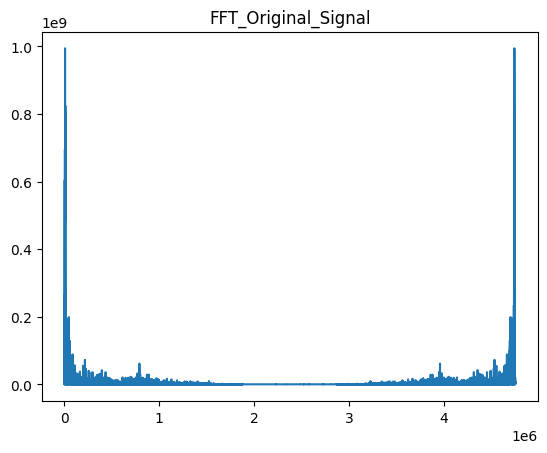

In [1]:
# %conda install -c conda-forge python-sounddevice , numpy , scipy , matplotlib
import numpy as np
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
# %conda install -c sounddevice
import sounddevice as sd

# 读取wav文件，得到采样率和数据
sample_rate, data = read('suno.wav') 

# 播放声音
sd.play(data[:1], sample_rate)
sd.wait()

# 打印采样率和数据
# print(sample_rate,data)

# 绘制声音波形
data_left = data[:, 0]
data_right = data[:, 1]
plt.figure("左声道原始信号")
plt.title("Left Channel Original Signal")
plt.plot(np.arange(len(data[:,0])),data[:,0])
plt.figure("右声道原始信号")
plt.title("Right Channel Original Signal")
plt.plot(np.arange(len(data[:,1])),data[:,1])
# plt.show()

#对于左声道音频信号做FFT
data_fft = np.fft.fft(data_left)
frequencies = np.abs(data_fft)
plt.figure("FFT_Original_Signal")
plt.title("FFT_Original_Signal")
plt.plot(frequencies)
plt.show()

# 创建载波信号
time = np.arange(len(data))/float(sample_rate)#载波时间
carrier_freq=sample_rate*20#载波频率


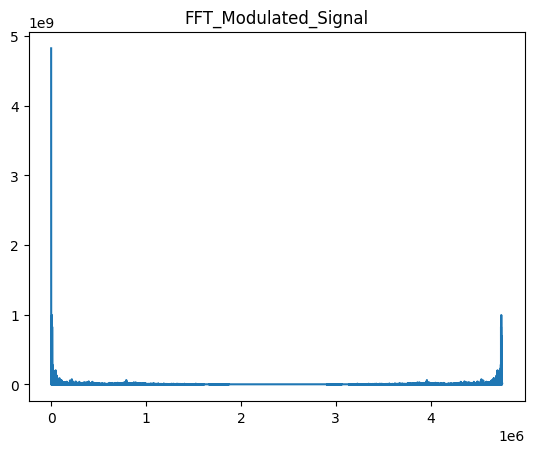

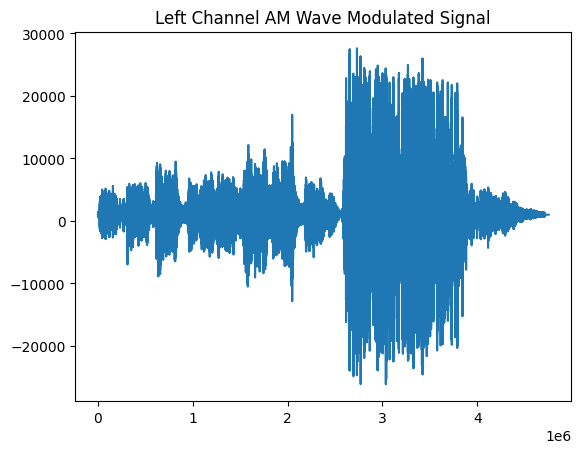

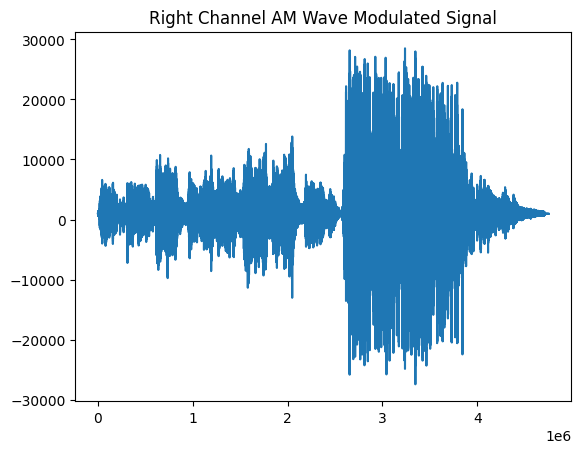

In [2]:
#产生载波信号
carrier = np.cos(2.0 * np.pi * carrier_freq * np.arange(len(data)))
modulated_data = np.empty_like(data)
A0=1000#直流分量

# 左右声道调制
modulated_left=modulated_data[:, 0] = carrier * (data[:, 0]+A0)#左声道调制
modulated_right=modulated_data[:, 1] = carrier * (data[:, 1]+A0)#右声道调制

#对左声道调制信号做FFT
modulated_data_fft = np.fft.fft(modulated_left)
frequencies = np.abs(modulated_data_fft)

#绘制调制信号波形和频谱
plt.figure("FFT_Modulated_Signal")
plt.title("FFT_Modulated_Signal")
plt.plot(frequencies)
plt.figure("左声道AM波调制信号")
plt.title("Left Channel AM Wave Modulated Signal")
plt.plot(np.arange(len(modulated_left)),modulated_left)
plt.figure("右声道AM波调制信号")
plt.title("Right Channel AM Wave Modulated Signal")
plt.plot(np.arange(len(modulated_right)),modulated_right)
plt.show()


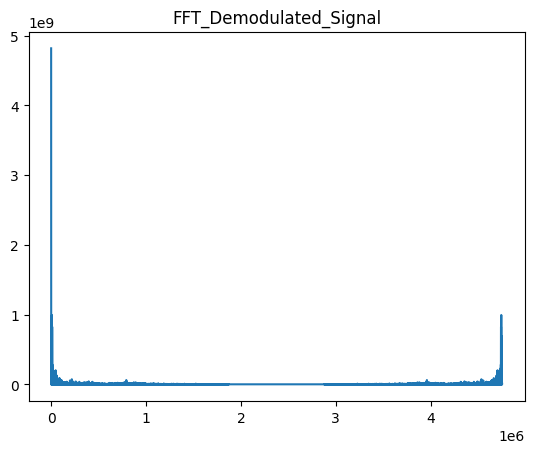

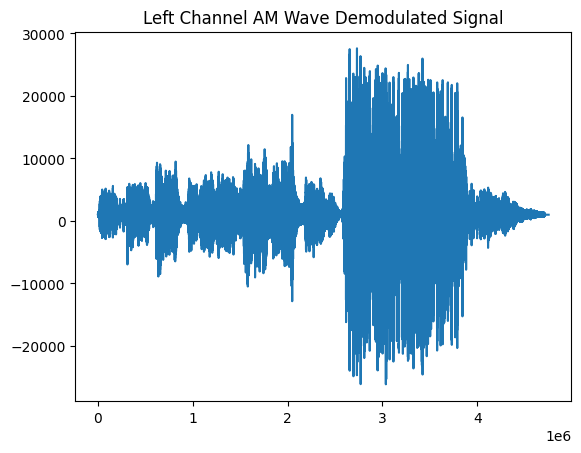

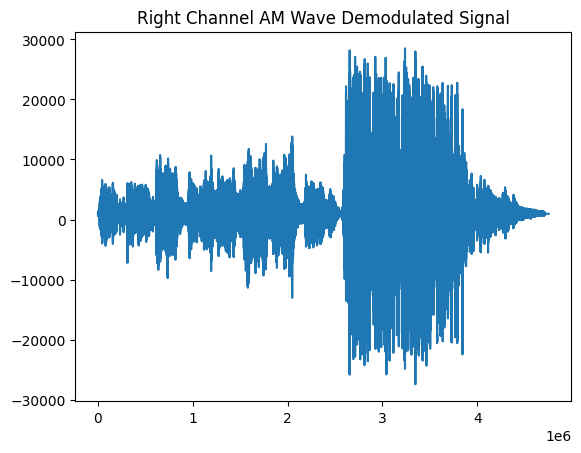

max(cha[:,0]):1002
max(cha[:,1]):1002
max(data[:,0]):26626
max(data[:,1]):27485
max(demodulated_data[:,0]):27624
max(demodulated_data[:,1]):28483
左声道解调成功
右声道解调成功


In [3]:
# 接下来对AM信号进行解调
# 生成解调信号
demodulated_data = np.empty_like(modulated_data)
demodulated_data[:, 0] = modulated_data[:, 0] * carrier#左声道解调
demodulated_data[:, 1] = modulated_data[:, 1] * carrier#右声道解调

# 对解调信号做FFT
demodulated_data_fft = np.fft.fft(demodulated_data[:, 0])
frequencies = np.abs(demodulated_data_fft)

# 绘制解调信号频谱
plt.figure("FFT_Demodulated_Signal")
plt.title("FFT_Demodulated_Signal")
plt.plot(frequencies)

# 绘制AM解调信号
plt.figure("左声道AM波解调信号")
plt.title("Left Channel AM Wave Demodulated Signal")
plt.plot(np.arange(len(demodulated_data[:, 0])),demodulated_data[:, 0])
plt.figure("右声道AM波解调信号")
plt.title("Right Channel AM Wave Demodulated Signal")
plt.plot(np.arange(len(demodulated_data[:, 1])),demodulated_data[:, 1])
plt.show()
# if(demodulated_data==data).all():
#     print("解调成功")
# else:
#     print("解调失败")

#判断是否解调成功
cha=demodulated_data-data
print("max(cha[:,0]):{}".format(max(cha[:,0])))
print(f"max(cha[:,1]):{max(cha[:,1])}")
print(f"max(data[:,0]):{max(data[:,0])}")
print(f"max(data[:,1]):{max(data[:,1])}")
print(f"max(demodulated_data[:,0]):{max(demodulated_data[:,0])}")
print(f"max(demodulated_data[:,1]):{max(demodulated_data[:,1])}")
if(max(cha[0])//max(data[:,0])<0.001):
    print("左声道解调成功")
else:
    print("左声道解调失败")

if(max(cha[1])//max(data[:,1])<0.001):
    print("右声道解调成功")
else:
    print("右声道解调失败")


# for i in range(0,len(data)):
# print(cha)
# sum_left=sum_right=0
# for i in range(0,len(cha)):
#     if cha[i][0]!=0:
#         sum_left+=1
#     if cha[i][1]!=0:
#         sum_right+=1
# print(f"sum_left:{sum_left}")
# print(f"sum_right:{sum_right}")

# if(demodulated_data[:,0]==data[:,0]).all():
#     print("左声道解调成功")
# else:
#     print("左声道解调失败")
# if(demodulated_data[:,1]==data[:,1]).all():
#     print("右声道解调成功")
# else:
#     print("右声道解调失败")

In [4]:
import numpy as np
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import sounddevice as sd

# 读取wav文件，得到采样率和数据
sample_rate, data = read('suno.wav') 

4752000 4752000


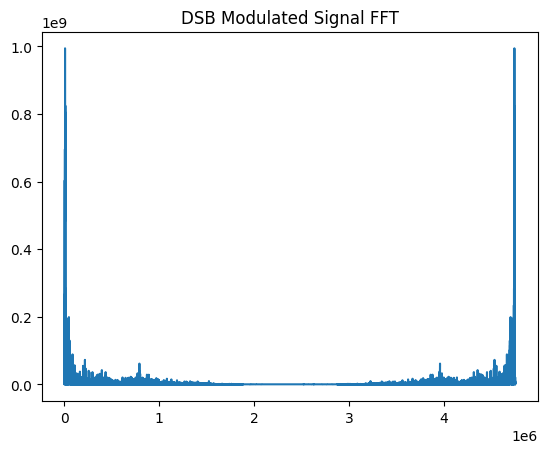

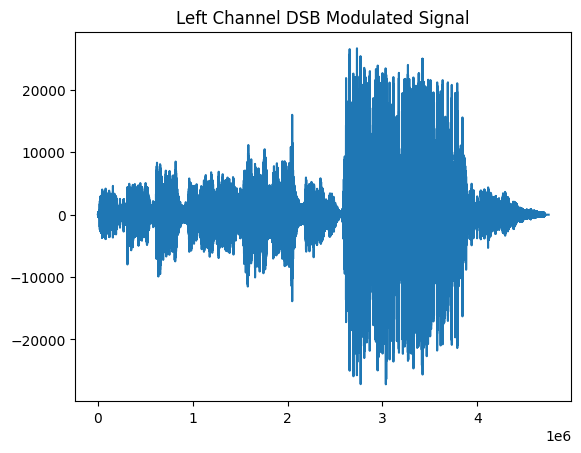

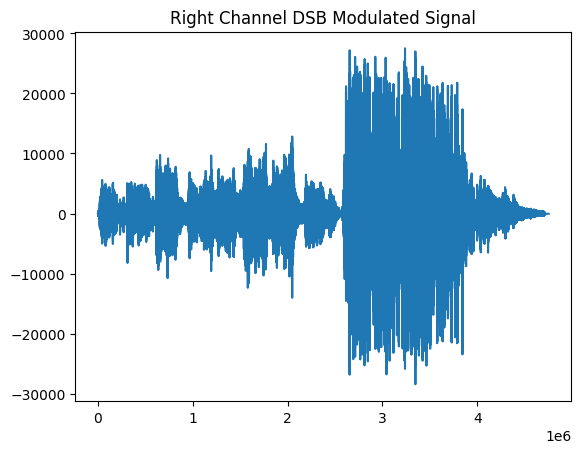

In [5]:
omiga_c=sample_rate*2
t = np.arange(len(data)) / sample_rate
# DSB调制
dsb_data = np.empty_like(data)
dsb_data[:, 0] = data[:, 0]*np.cos(2 * np.pi * omiga_c * t)
dsb_data[:, 1] = data[:, 1]*np.cos(2 * np.pi * omiga_c * t)

#对左声道DSB调制信号做FFT
dsb_data_FFT=np.fft.fft(dsb_data[:,0])
frequencies=abs(dsb_data_FFT)

#绘制DSB调制信号频谱
plt.figure()
plt.title("DSB Modulated Signal FFT")
plt.plot(frequencies)

# 绘制DSB调制信号
plt.figure("左声道DSB调制信号")
plt.title("Left Channel DSB Modulated Signal")
X=np.arange(dsb_data.size/2)
print(len(X),len(dsb_data[:,0]))
plt.plot(X, dsb_data[:, 0])
plt.figure("右声道DSB调制信号")
plt.title("Right Channel DSB Modulated Signal")
plt.plot(X, dsb_data[:, 1])
plt.show()

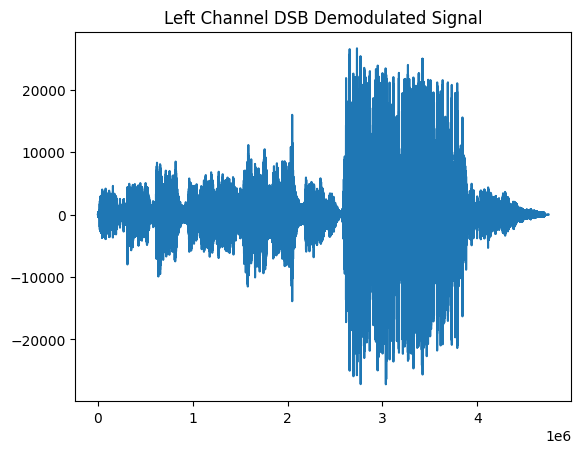

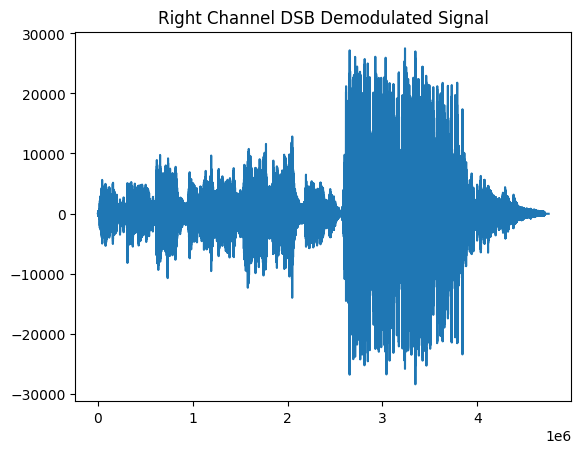

In [6]:
# 相干解调
# 生成解调信号
demodulated_data = np.empty_like(dsb_data)
demodulated_data[:, 0] = dsb_data[:, 0] * np.cos(2 * np.pi * omiga_c * t)
demodulated_data[:, 1] = dsb_data[:, 1] * np.cos(2 * np.pi * omiga_c * t)
plt.figure("左声道DSB解调信号")
plt.title("Left Channel DSB Demodulated Signal")
plt.plot(X, demodulated_data[:, 0])
plt.figure("右声道DSB解调信号")
plt.title("Right Channel DSB Demodulated Signal")
plt.plot(X, demodulated_data[:, 1])
plt.show()

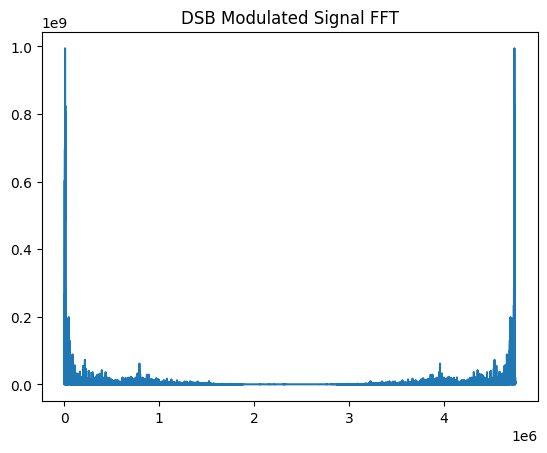

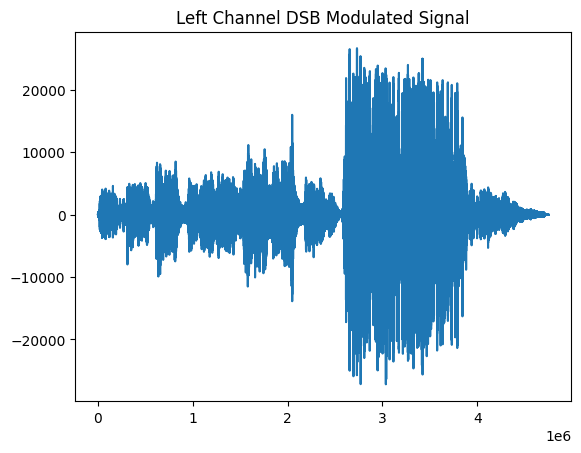

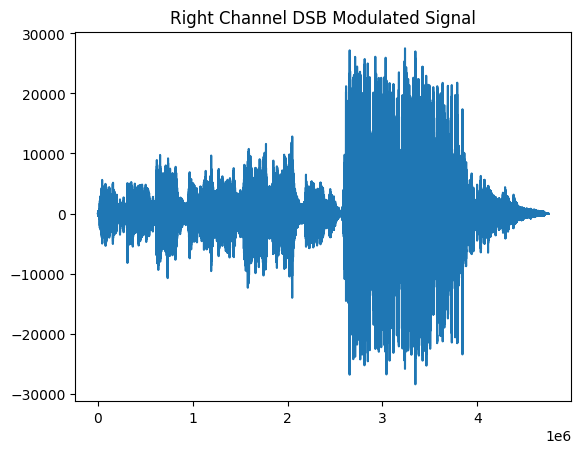

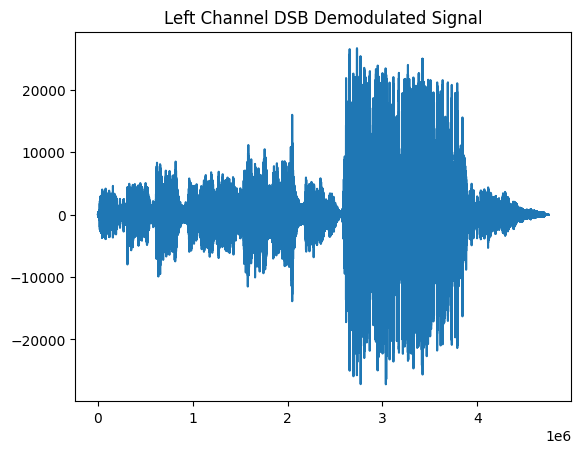

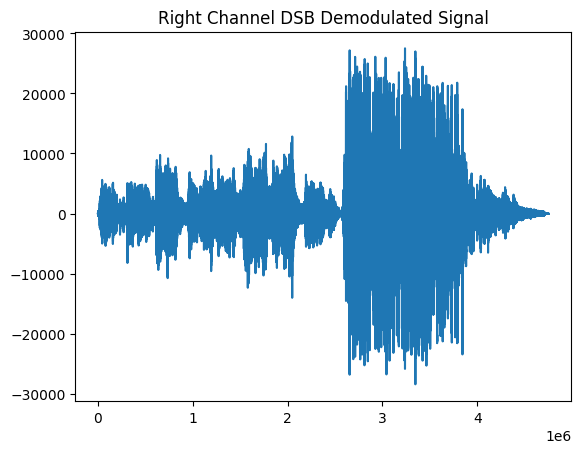

In [7]:
# 假设信噪比为 10dB
SNR = 100

# 给音乐信号加入高斯白噪声
noise = np.random.normal(0, 1, data.shape)
noise = noise / np.linalg.norm(noise) * np.linalg.norm(data) / 10**(SNR/20)
noisy_data = data + noise

# 播放加噪声的音乐，10db,100db的时候会听到明显的噪声，真的好难受【哭】
sd.play(noisy_data, sample_rate)
sd.wait()

# DSB调制
dsb_noisy_data = np.empty_like(noisy_data)
dsb_noisy_data[:, 0] = noisy_data[:, 0]*np.cos(2 * np.pi * omiga_c * t)
dsb_noisy_data[:, 1] = noisy_data[:, 1]*np.cos(2 * np.pi * omiga_c * t)

#对左声道DSB调制信号做FFT
dsb_noisy_data_FFT=np.fft.fft(dsb_noisy_data[:,0])
frequencies=abs(dsb_noisy_data_FFT)

#绘制DSB调制信号频谱
plt.figure()
plt.title("DSB Modulated Signal FFT")
plt.plot(frequencies)

# 绘制DSB调制信号
plt.figure("左声道DSB调制信号")
plt.title("Left Channel DSB Modulated Signal")
X=np.arange(dsb_noisy_data.size/2)
plt.plot(X, dsb_noisy_data[:, 0])
plt.figure("右声道DSB调制信号")
plt.title("Right Channel DSB Modulated Signal")
plt.plot(X, dsb_noisy_data[:, 1])
plt.show()

# 相干解调
# 生成解调信号
demodulated_noisy_data = np.empty_like(dsb_noisy_data)
demodulated_noisy_data[:, 0] = dsb_noisy_data[:, 0] * np.cos(2 * np.pi * omiga_c * t)
demodulated_noisy_data[:, 1] = dsb_noisy_data[:, 1] * np.cos(2 * np.pi * omiga_c * t)
plt.figure("左声道DSB解调信号")
plt.title("Left Channel DSB Demodulated Signal")
plt.plot(X, demodulated_noisy_data[:, 0])
plt.figure("右声道DSB解调信号")
plt.title("Right Channel DSB Demodulated Signal")
plt.plot(X, demodulated_noisy_data[:, 1])
plt.show()

# 播放解调后的音乐，这个时候会听到明显的噪声，真的好难受【哭】
# sd.play(demodulated_noisy_data, sample_rate)
# sd.wait()

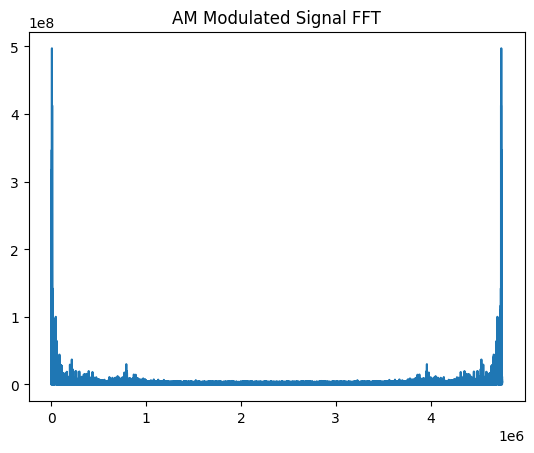

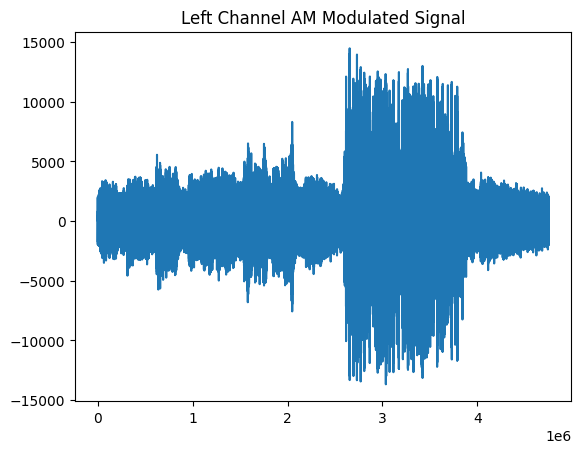

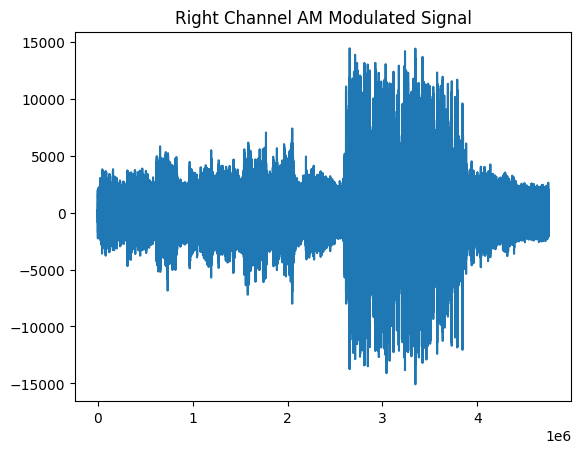

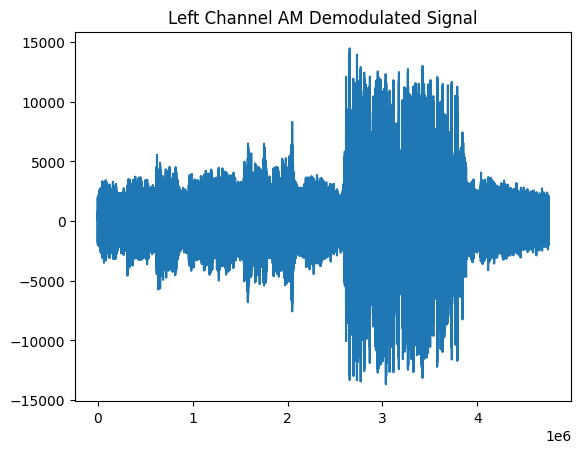

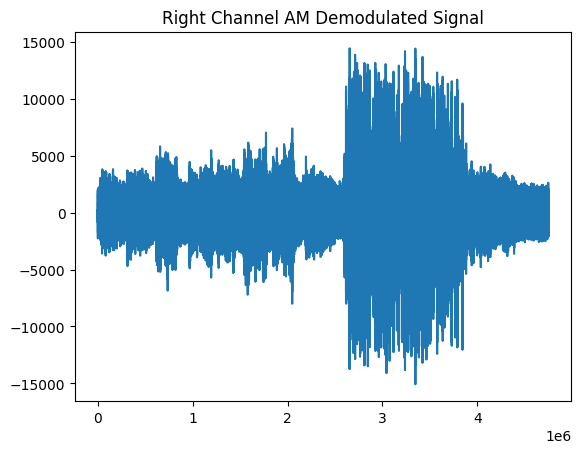

In [8]:
# 信噪比为 10dB
SNR = 10

# 给音乐信号加入高斯白噪声
noise = np.random.normal(0, 1, data.shape)
noise = noise / np.linalg.norm(noise) * np.linalg.norm(data) / 10**(SNR/20)
noisy_data = data + noise

# 给音乐做AM调制
modulated_data = np.empty_like(data)
modulated_data[:, 0] = (1 + 0.5 * noisy_data[:, 0]) * np.cos(2 * np.pi * omiga_c * t)
modulated_data[:, 1] = (1 + 0.5 * noisy_data[:, 1]) * np.cos(2 * np.pi * omiga_c * t)

#对左声道AM调制信号做FFT
modulated_data_FFT=np.fft.fft(modulated_data[:,0])
frequencies=abs(modulated_data_FFT)

# 解调AM调制信号
demodulated_data = np.empty_like(modulated_data)
demodulated_data[:, 0] = modulated_data[:, 0] * np.cos(2 * np.pi * omiga_c * t)
demodulated_data[:, 1] = modulated_data[:, 1] * np.cos(2 * np.pi * omiga_c * t)

# 播放解调信号，电脑硬件音量相同时，AM解调信号的音乐声音小于原始音乐声音，也小于DSB解调信号的音乐声音
# sd.play(demodulated_data, sample_rate)
# sd.wait()

#绘制AM调制信号频谱
plt.figure()
plt.title("AM Modulated Signal FFT")
plt.plot(frequencies)

# 绘制AM调制信号
plt.figure("左声道AM调制信号")
plt.title("Left Channel AM Modulated Signal")
X=np.arange(modulated_data.size/2)
plt.plot(X, modulated_data[:, 0])
plt.figure("右声道AM调制信号")
plt.title("Right Channel AM Modulated Signal")
plt.plot(X, modulated_data[:, 1])
plt.show()

# 相干解调
# 生成解调信号
demodulated_data = np.empty_like(modulated_data)
demodulated_data[:, 0] = modulated_data[:, 0] * np.cos(2 * np.pi * omiga_c * t)
demodulated_data[:, 1] = modulated_data[:, 1] * np.cos(2 * np.pi * omiga_c * t)
plt.figure("左声道AM解调信号")
plt.title("Left Channel AM Demodulated Signal")
plt.plot(X, demodulated_data[:, 0])
plt.figure("右声道AM解调信号")
plt.title("Right Channel AM Demodulated Signal")
plt.plot(X, demodulated_data[:, 1])
plt.show()